"We are from our childhood as we are from one country." (c) Antoine De Saint Exupéry

<h1><center> Analysis of urban versus rural living</center></h1>
![](https://sustainabilityatspu.files.wordpress.com/2014/01/urban-and-rural.jpg?w=1097&h=784)

Childhood has a great impact on our preferences, fears, emotions. The goal of this notebook is to analyze if there are differences between the participants based on where they lived most of the childhood: rural (village) and urban (city) area.

We will start with exploratory analysis to get some insights about the dataset and then use logistic regression to be able to interfere the variable impact.

I will happy to hear some remarks or suggestions and feel free to upvote if you like it :)


In [6]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import copy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# styling
pd.set_option('display.max_columns',150)
plt.style.use('bmh')
from IPython.display import display

# a bit of machine learning
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV

%matplotlib inline

In [7]:
young = pd.read_csv('data/responses.csv')

In [8]:
young.head(2)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats


Almost everybody enjoys music, the mean is 4.7.

In [9]:
young.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,1002.000000,1006.000000,1003.000000,1004.000000,1003.000000,1003.000000,1002.000000,1003.000000,1009.000000,1004.000000,1008.000000,1009.000000,1007.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1002.000000,1006.000000,1008.000000,1008.000000,1005.000000,1009.000000,1007.000000,1007.000000,1006.000000,1004.000000,1005.000000,1004.000000,1000.000000,1004.000000,1001.000000,1005.000000,1005.000000,1009.000000,1006.000000,1004.000000,1007.000000,1003.000000,1007.000000,1009.000000,1004.000000,995.000000,1006.000000,1003.000000,1008.000000,1008.000000,1004.000000,1002.000000,1006.000000,1007.000000,1006.00000,1007.000000,1009.000000,1008.000000,1007.000000,1005.000000,1010.000000,1007.000000,1009.000000,1009.000000,1009.000000,1007.000000,1003.000000,1005.000000,1007.000000,1005.000000,1007.000000,1003.000000,1006.000000,1009.000000,1006.000000,1004.000000,1006.000000,1009.000000,1003.000000,1006.000000,1007.000000,1005.000000,1006.000000,1006.000000,1005.000000,1010.000000,1004.000000,1003.000000,1008.000000,1009.000000,1006.000000,1009.000000,1008.000000,1008.000000,1010.000000,1007.000000,1010.000000,1007.000000,1008.000000,1006.000000,1007.000000,1005.000000,1008.000000,1004.000000,1006.000000,1008.000000,1006.000000,1008.000000,1008.000000,1007.000000,1007.000000,1006.000000,1005.000000,1006.000000,1006.000000,1006.000000,1005.000000,1007.000000,1008.000000,1006.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,2.456088,2.910537,2.769691,2.759960,3.141575,2.828514,2.842315,2.338983,2.139742,4.613546,2.793651,3.383548,4.494538,3.489573,3.113095,3.155754,3.749752,3.788481,3.643713,2.126243,3.536706,3.207341,3.138308,2.595639,2.334657,2.064548,4.175944,3.136454,2.643781,2.665339,2.165000,3.159363,3.082917,3.778109,2.516418,2.256690,2.686879,2.589641,2.273088,3.686939,2.461768,2.324083,1.901394,3.387940,3.291252,1.907278,2.362103,3.276786,3.234064,3.024950,4.557654,2.948361,3.33499,2.061569

## Exploratory analysis
### Missing values


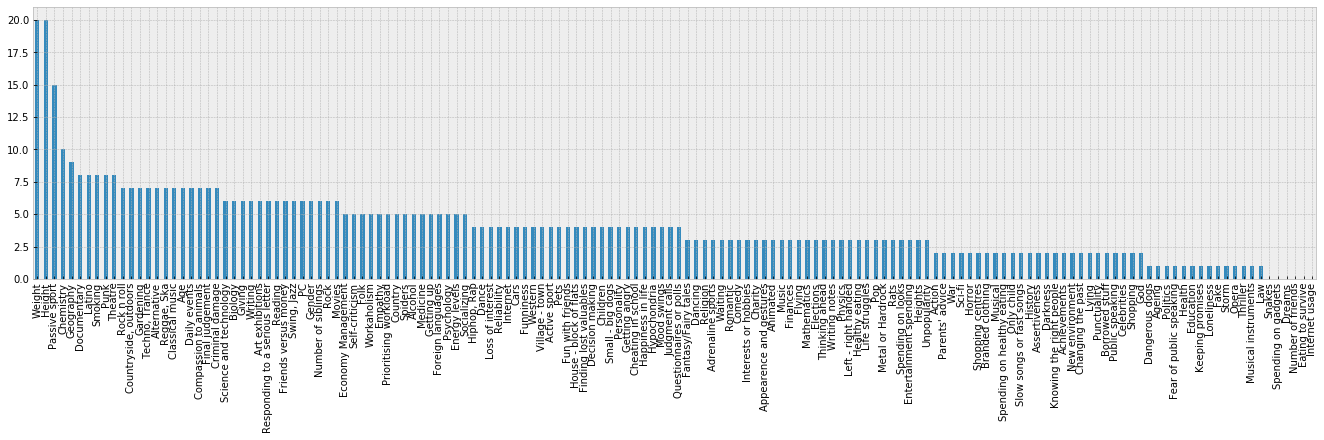

In [10]:
nulls = young.isnull().sum().sort_values(ascending=False)
nulls.plot(
    kind='bar', figsize=(23, 5))

Missing values are always a pain because we do not know why people did not fill this field or maybe there was a post-processing error (how the data was transfered to the digital form) in the dataset. "In 2013, students of the Statistics class at FSEV UK were asked to invite their friends to participate in this survey." Might be that participants of the survey, knowing that their data will be analyzed by their friends did not provide information like Age, Weight and Height because that are the main features according to which one can be identified.

In [11]:
print('Number of girls who omitted weight field: {:.0f}'.format(
    young[young['Gender'] == 'female']['Weight'].isnull().sum()))
print('Number of boys who omitted weight field: {:.0f}'.format(
    young[young['Gender'] == 'male']['Weight'].isnull().sum()))
print('Number of girls who omitted height field: {:.0f}'.format(
    young[young['Gender'] == 'female']['Height'].isnull().sum()))
print('Number of boys who omitted height field: {:.0f}'.format(
    young[young['Gender'] == 'male']['Height'].isnull().sum()))

Number of girls who omitted weight field: 13
Number of boys who omitted weight field: 6
Number of girls who omitted height field: 13
Number of boys who omitted height field: 6


Outch! Those numbers look weird. There is an amazing observation called Twyman's Law, which states: "Any piece of data or evidence that looks interesting or unusual is probably wrong!" Lets zoom on individuals of those NAs values.

In [12]:
omitted = young[(young['Weight'].isnull()) | young['Height'].isnull()]
print('Number of people with omitted weight or height: {:.0f}'.format(omitted.shape[0]))
nas = omitted.drop(['Weight', 'Height', 'Number of siblings', 'Age'], 1).isnull().sum().sum()
print('Number of fields that were omitted by people who did not fill Weight or Height: {:.0f}'.format(nas))

Number of people with omitted weight or height: 30
Number of fields that were omitted by people who did not fill Weight or Height: 18


Interestingly, that those who omitted height or weight or age or number of sibligs omitted obly 18 otehr fields, what supports the hypothesis regarding the age, weight and height identification. In further we will impute the missing values.

## Understanding our goal

As I mentioned, the focus will be on the analysis of urban and rural areas. So, we drop records that are missing in 'Village - town' column.

Btw as I always try to automatize/generalize things, this kernel can be used for analysis of other variables of interest. Just change 'var_of_interest', mapping and two fields in ML section.

In [13]:
var_of_interest = 'Village - town'
mapping = {var_of_interest: {'city': 0, 'village': 1}}
young.dropna(subset=[var_of_interest], inplace=True)
# to be able to use hue parameter for better comparison in seaborn
young["all"] = ""

(array([0, 1]), <a list of 2 Text yticklabel objects>)

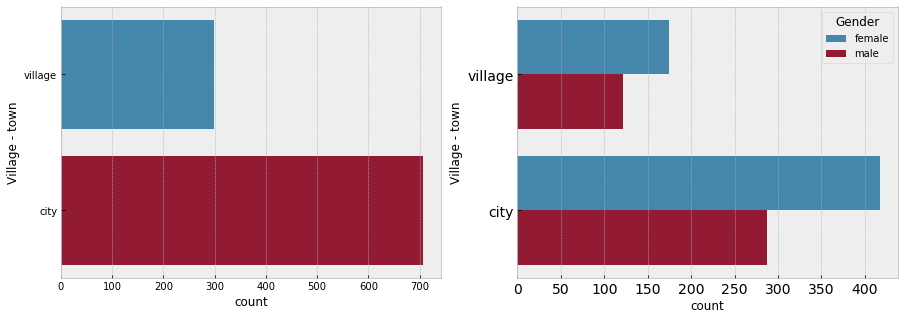

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.countplot(y=var_of_interest, data=young, ax=ax[0])
sns.countplot(y=var_of_interest, hue='Gender', data=young, ax=ax[1])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

The classes are highly imbalanced, there are twice so many people used to live in city then in the village. Imbalanced classes could be a problem for ML algorithms, we will discuss how to solve it but here are some ideas: oversampling, undersampling, (nice package to use is from imblearn.over_sampling.SMOTE)  and class weights defintions.

## Outliers

Lets have a look if there are any differences in height, weight or age between people from urban and rural areas

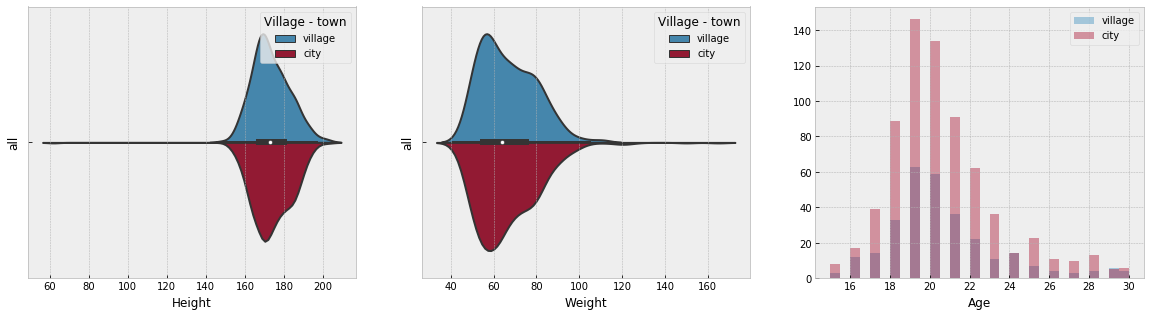

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
data = young.dropna(subset=['Height'])
sns.violinplot(x='Height', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[0]);
data = young.dropna(subset=['Weight'])
sns.violinplot(x='Weight', y = "all", hue=var_of_interest, data=data, split=True, ax = ax[1]);

var_of_int_ser = young[var_of_interest]
sns.distplot(young[var_of_int_ser=='village'].Age.dropna(),
             label='village', ax=ax[2], kde=False, bins=30);

sns.distplot(young[var_of_int_ser=='city'].Age.dropna(),
             label='city', ax=ax[2], kde=False, bins=30);
ax[2].legend()

As we see there are some outliers that disturb the visualisation.

In [16]:
display(young[young['Height']<70][['Age', 'Height', 'Weight', 'Gender', var_of_interest]])
display(young[young['Weight']>120][['Age', 'Height', 'Weight', 'Gender', var_of_interest]])

,Age,Height,Weight,Gender,Village - town
676,20.0,62.0,55.0,female,city


,Age,Height,Weight,Gender,Village - town
859,20.0,190.0,125.0,male,city
885,23.0,NaN,165.0,female,city
992,30.0,200.0,150.0,male,city


Also, keep in mind that participants could have mistaken the fields, so instead of writing their height in 'height' field, they could have written it in 'weight' field (165 kg could be actually intended to be 165 cm) . Or have just made a mistake while filling up the questionnaire (so 62 cm could have been 162 cm).
We will exclude two outliers because they might be just an error in the dataset and two guys who are weight more than 125 kg.

In [17]:
young.drop([676,885,992, 859], inplace = True)

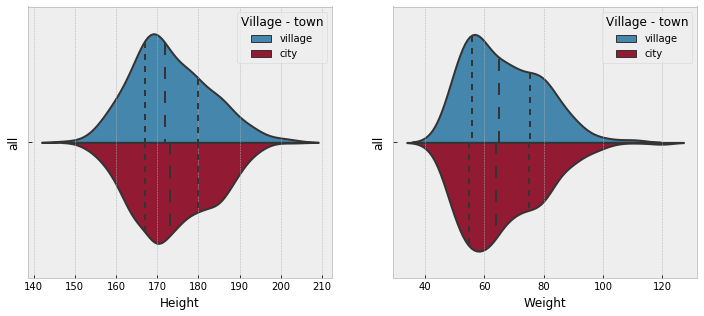

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
data = young.dropna(subset=['Height'])
sns.violinplot(x='Height', y="all", hue=var_of_interest, data=data, 
                   split=True, ax=ax[0], inner='quartile');

data = young.dropna(subset=['Weight'])
sns.violinplot(x='Weight', y="all", hue=var_of_interest, data=data, 
                   split=True, ax=ax[1], inner='quartile');

Interestingly, there is a small secong hill in Height in city people around 185 cm. The horizontal lines are quartiles.

As TheTS mentioned in the comments, we could look at BMI of rural versus urban people. BMI is calculated as follows: weight/height^2. The hypothesis is that urban people will have a lower BMI as they might spend more times outdoors.

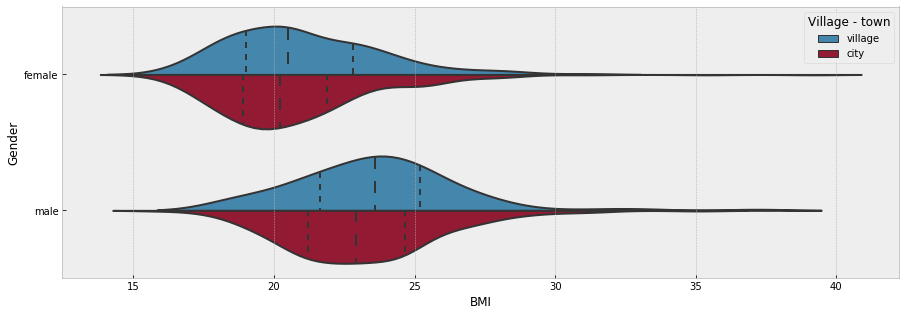

In [19]:
young['BMI'] = round(young['Weight']/((young['Height']/100)**2),1)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
data = young.dropna(subset=['BMI'])
sns.violinplot(x='BMI', hue=var_of_interest, y='Gender', data=data, 
               split=True, inner='quartile', ax=ax);


Surprisingly, the BMI of villagers is higher than of urban people. We can quickly check if it is significant. For that we will use a a two-sample one-sided t-test. 

In [20]:
import scipy.stats as stats
city_bmi = data[data[var_of_interest]=='city'].BMI
village_bmi  = data[data[var_of_interest]=='village'].BMI
t, p = stats.ttest_ind(village_bmi, city_bmi, axis=0, equal_var=False)
print(' t-stat = {t} \n p-value = {p}'.format(t=t,p=p/2))


 t-stat = 1.7734182239050904 
 p-value = 0.03837342374443175


p-value is less than 0.05. There is indeed a significant difference in BMI.
BUT lets look at different age categories. We will have only two categories: under 20 and above 20. There are two main reasons for choosing this threshold:
1. Around the age of 20 people start to think about theit sport and food habits.
2. The question os the survey is forumlated as "I spent most of my childhood in a village or city". Most of 20 years old are still either living in the places where they spent their childhood or just have left them, meaning they were just shortly under its influence.

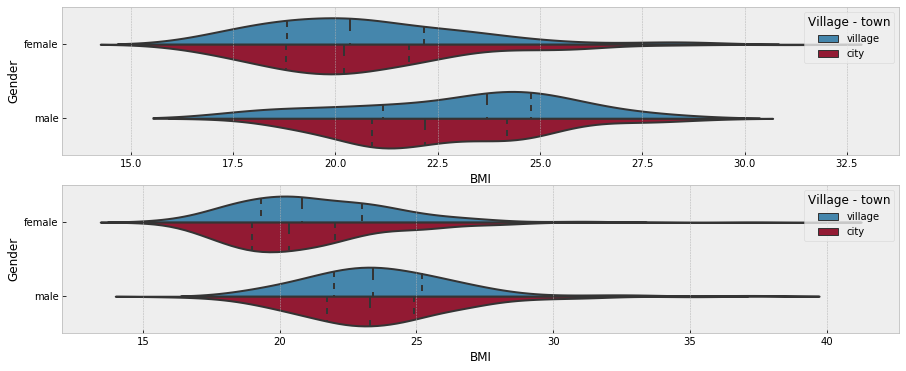

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,6))
data_under = data[data['Age']<20]
data_above = data[data['Age']>=20]
sns.violinplot(x='BMI', hue=var_of_interest, y='Gender', data=data_under, split=True, 
                   inner = 'quartile', ax=ax[0], hue_order=['village', 'city']);
sns.violinplot(x='BMI', hue=var_of_interest, y='Gender', data=data_above, split=True, 
                   inner = 'quartile', ax=ax[1], hue_order=['village', 'city']);


What a surprise! The major drive of the difference is the BMI of males under 20 years old. Watson, we need to dig deeper! Lets have a look of how many individuals are causing this shift.

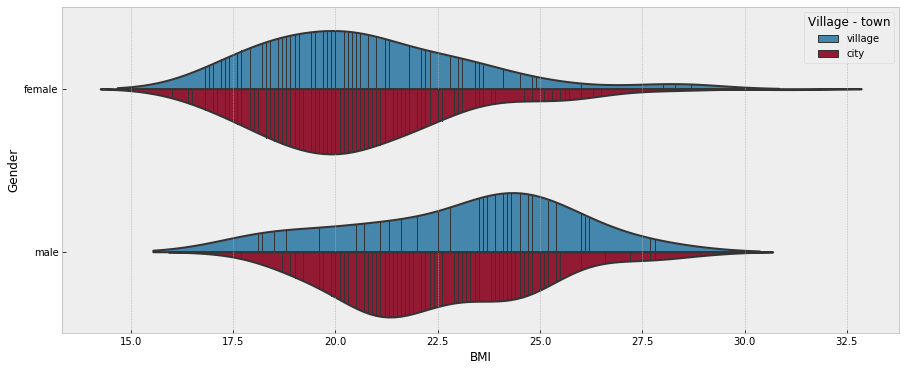

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
sns.violinplot(x='BMI', hue=var_of_interest, y='Gender', data=data_under, 
               split=True, inner='stick', ax=ax, hue_order=['village', 'city']);


My explanation for this inetresting fact is that in the cities young boys have much more sport possibilities and trainings than do have the rural boys. However, I would be happy to hear your reasoning :)

## Interesting differences

In this section we will analyze differences between the individuals based on the area of living.

## Correlation

Firstly, look at correlations between the charachteristics and the urban-rural area. Correlation describes the degree of relationship between two variables. However, it tells nothing about the causuality. Just a small example, the anti-violent gaming policies say that there is a correlation between time spent on playing violent computer games and a violent behaviour. In fact, we do not know if a the computer games make a person violent ora violent person would play more violent games.  

(Btw, I am a big fan of long-lasting code and functions that can be applied on different datasets :) ). So, the function correlation_plot can be applied on different datasets. The function produces two plots: one for numerical features, another for categorical.

In [23]:
def do_ploting(x, y, figsize):
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title("Correlation coefficient of the variables")
    sns.barplot(x=x, y=y, ax=ax)
    ax.set_ylabel("Correlation coefficients")


def correlation_plot(var_of_interest, df_main, mapping, figsize=(10, 30)):
    def calc_corr(var_of_interest, df, cols, figsize):
        lbls = []
        vals = []
        for col in cols:
            lbls.append(col)
            vals.append(np.corrcoef(df[col], df[var_of_interest])[0, 1])
        corrs = pd.DataFrame({'features': lbls, 'corr_values': vals})
        corrs = corrs.sort_values(by='corr_values')
        do_ploting(corrs.corr_values, corrs['features'], figsize)
        return corrs

    #imputing the set
    df = copy.deepcopy(df_main)
    df.replace(mapping, inplace=True)
    mean_values = df.mean(axis=0)
    df.fillna(mean_values, inplace=True)

    #correlating non-categorical varibales
    cols_floats = [col for col in df.columns if df[col].dtype != 'object']
    cols_floats.remove(var_of_interest)
    corrs_one = calc_corr(var_of_interest, df, cols_floats, figsize)

    #correlating categorical variables
    cols_cats = [col for col in df.columns if df[col].dtype == 'object']
    if cols_cats:
        df_dummies = pd.get_dummies(df[cols_cats])
        cols_cats = df_dummies.columns
        df_dummies[var_of_interest] = df[var_of_interest]
        corrs_two = calc_corr(var_of_interest, df_dummies, cols_cats, (5, 10))
    else:
        corrs_two = 0
    return [corrs_one, corrs_two]

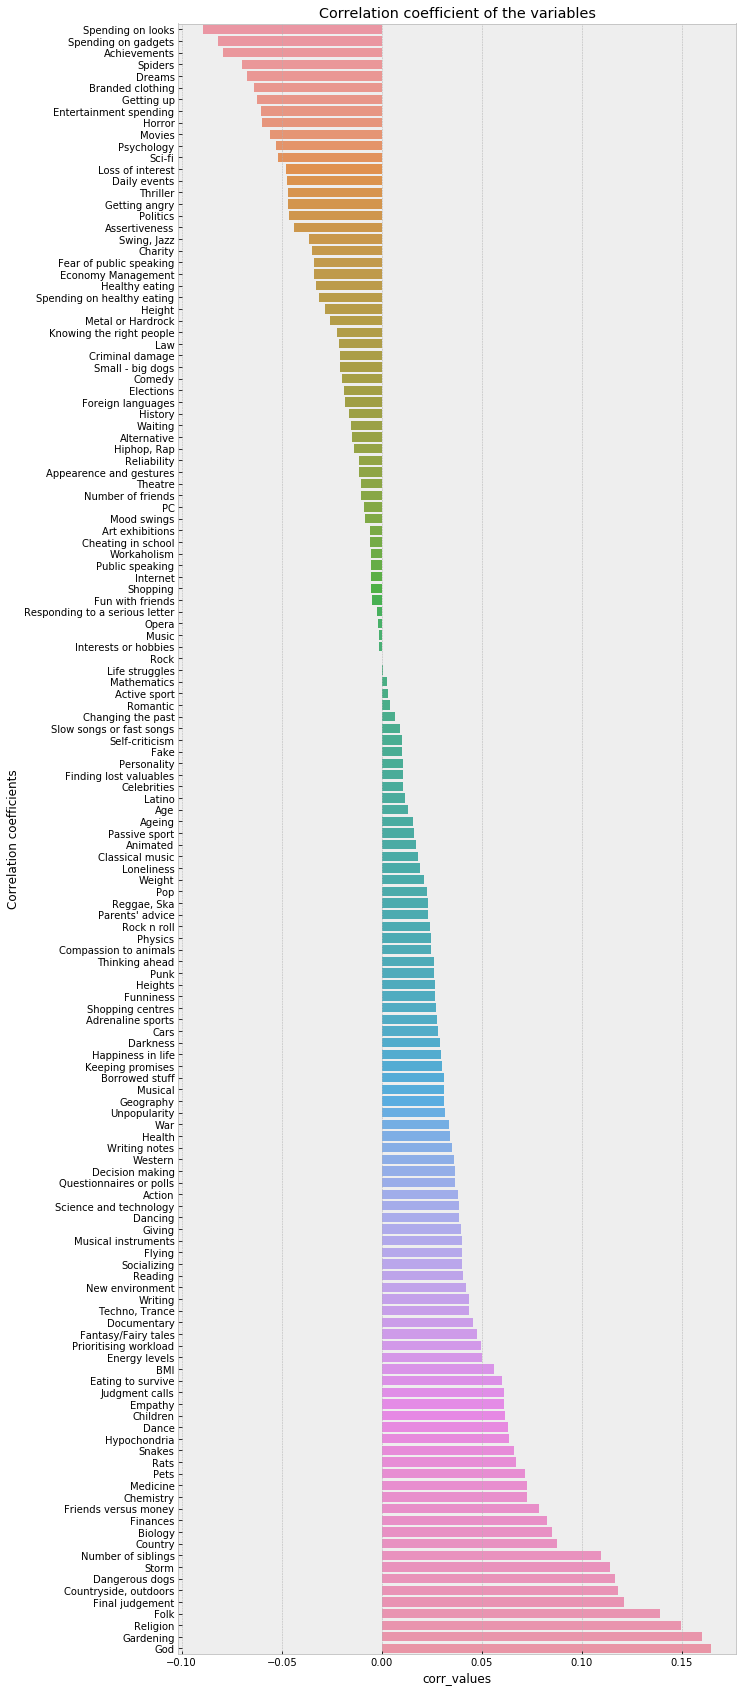

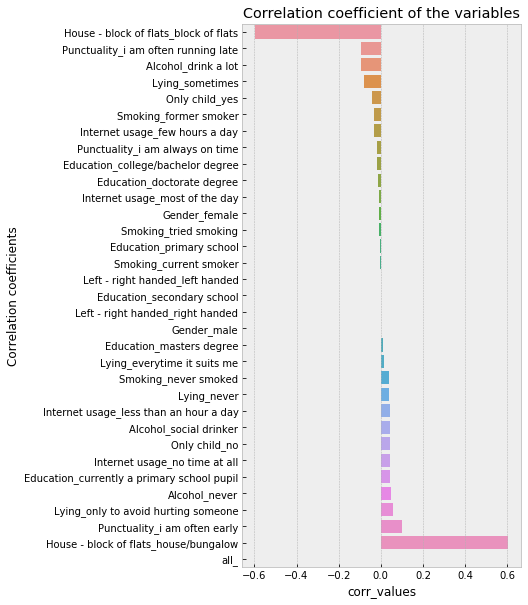

In [24]:
corrs_area = correlation_plot(var_of_interest, young, mapping)

The strongest correlations that we have are coming fro the house type and it is quite logical because people in the village would live most of the time in the houses. Other correlations that are not that strong are the associations with God and Spending on looks. We will dig into it.



In [25]:
#The strongest correlations that we have are  
corr_num = corrs_area[0]
corr_cats = corrs_area[1]
display(corr_num[corr_num.corr_values == max(corr_num.corr_values)])
display(corr_num[corr_num.corr_values == min(corr_num.corr_values)])
display(corr_cats[corr_cats.corr_values == max(corr_cats.corr_values)])
display(corr_cats[corr_cats.corr_values == min(corr_cats.corr_values)])

,features,corr_values
101,God,0.164462


,features,corr_values
132,Spending on looks,-0.089162


,features,corr_values
31,House - block of flats_house/bungalow,0.604884


,features,corr_values
30,House - block of flats_block of flats,-0.598687


## Characteristic differences

I have picked the features that were different among people from urban and rural areas. The plot of all features can be found at the end of this notebook.

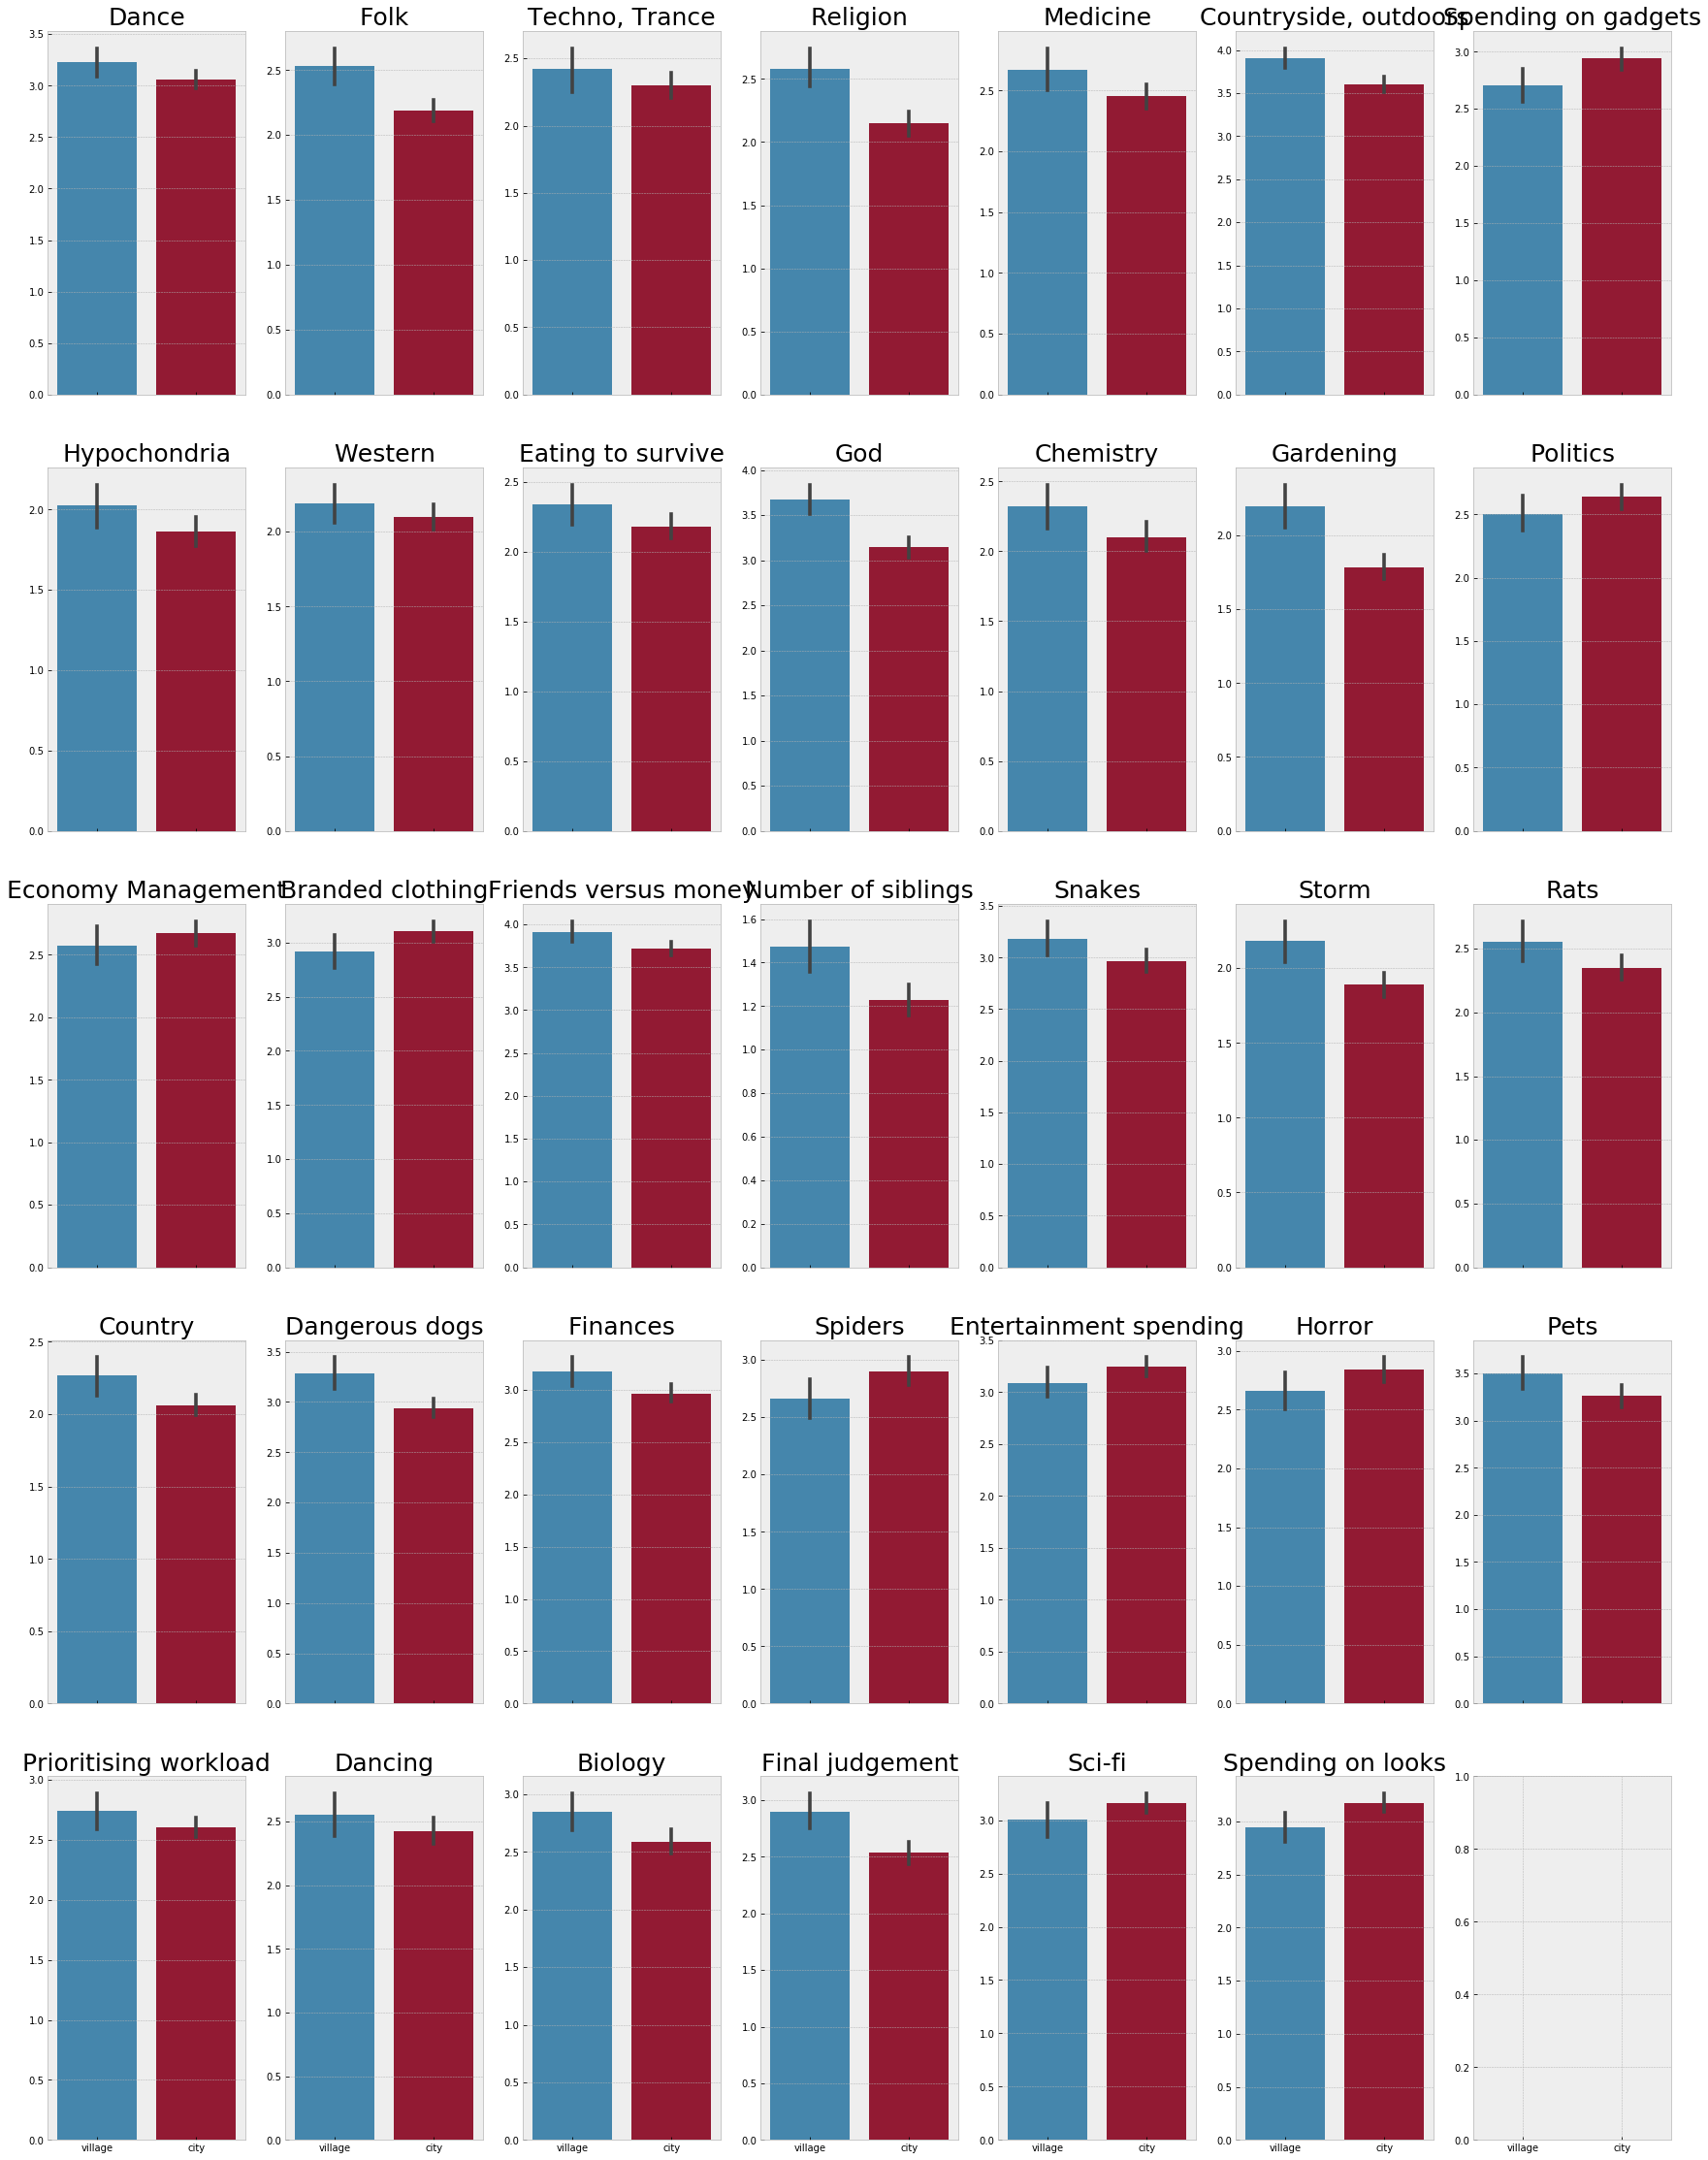

In [26]:
good_columns = ['Dance', 'Folk', 'Techno, Trance','Religion', 'Medicine', 'Countryside, outdoors',
                'Spending on gadgets','Hypochondria','Western', 'Eating to survive', 
                'God', 'Chemistry', 'Gardening', 'Politics','Economy Management',
                'Branded clothing', 'Friends versus money','Number of siblings', 'Snakes',
                'Storm', 'Rats', 'Country', 'Dangerous dogs', 'Finances', 'Spiders', 
                'Entertainment spending', 'Horror', 'Pets', 'Prioritising workload', 'Dancing',
                'Biology', 'Final judgement', 'Sci-fi', 'Spending on looks']
fig, ax = plt.subplots(nrows=5, ncols=7 ,figsize=(30,40), sharex=True)
start = 0
for j in range(5):
    for i in range(7):
        if start == len(good_columns):
            break
        sns.barplot(y=good_columns[start], x=var_of_interest, data=young, ax=ax[j,i])
        ax[j,i].set_ylabel('')
        ax[j,i].set_xlabel('')
        ax[j,i].set_title(good_columns[start], fontsize=25)
        start += 1


There are several interesting observations:

People from rural area are more into folk music; are more likely to spend time outdoors gardening; also there are more interested in biology, medicine and chemistry. It is quite logical as people in villages are often more close to the nature and therefore would spend time outdoors exploring. Also, the phobias of snakes, rats, dangerous dogs and storm are well-marked in people living in rural areas as they could have had a direct contact to it and know about the circumstances. On the other hand, they are less afraid of the spiders which again can be explained due to the fact that they were more exposed to the nature. Village-livers are more hypochondriac than city-livers which can be explained that there are less hospitals and doctors in villages.

What is a bit striking is that peopel from rural areas are more religios (Religion and God) than in the city. Additionaly, they are proned to "Final judgement" aka "I believe that bad people will suffer one day and good people will be rewarded". It can also have something to do with the stronger belief in God.

City-livers would spend more money on looks, entertainment and branded clothing as norally cities offer much more possibilitie to go shopping and have more entertainment facilities than the villages. Also, they would spend more time on gadgets.

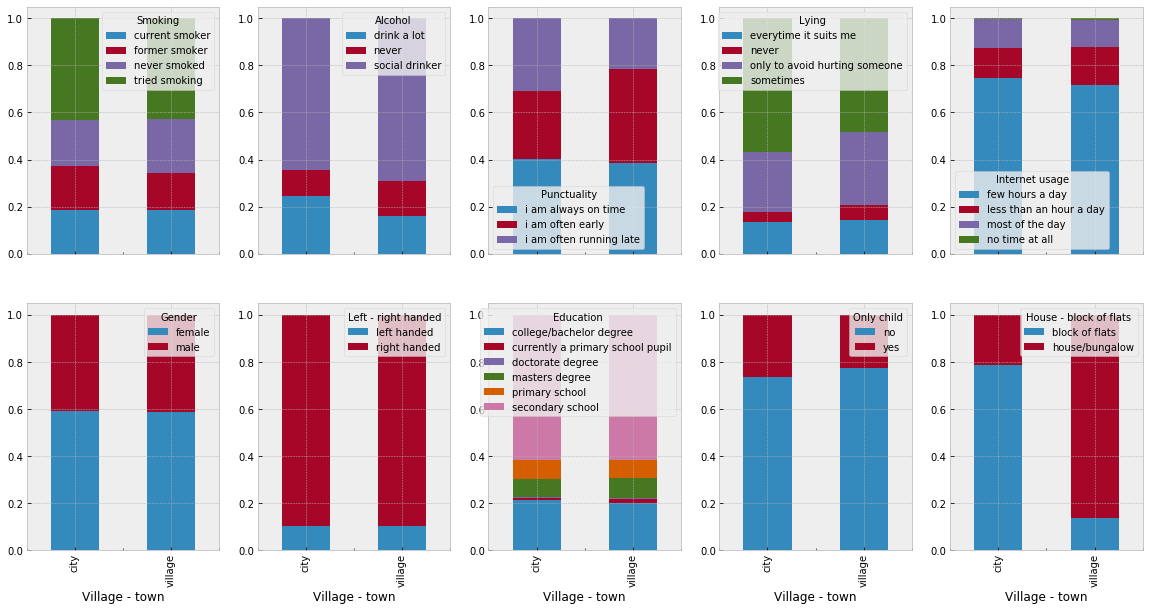

In [27]:
features_cats = [col for col in young.columns if young[col].dtype=='object']
features_cats.remove(var_of_interest)
fig, ax = plt.subplots(nrows=2, ncols=5,figsize=(20,10), sharex=True)
start = 0
for j in range(2):
    for i in range(5):
        tab = pd.crosstab(young[var_of_interest], young[features_cats[start]])
        tab_prop = tab.div(tab.sum(1).astype(float), axis=0)
        tab_prop.plot(kind="bar", stacked=True, ax=ax[j,i] )
        start += 1

In the categorial features only one thing catches the eye, namelly, that village-livers mst of the time live in the houses comparing to the city livers who most live in the flat. That is also self-explanatory.

## Multicollinearity

Apart from outliers and missing values, multicollinearity is another common issue. Some ML algorithms like Random Forest do not suffer from multicollinearity, whereas linear regression could have problems with it. 

So, it would be quite exciting to look which characteristics are correlated in our data set.

In [28]:
corr = young.corr()
# code: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
# the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

os = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
display(os.head(10))
display(os.tail(10))

Weight               BMI                 0.845273
Height               Weight              0.737569
Biology              Medicine            0.717139
                     Chemistry           0.688564
Fantasy/Fairy tales  Animated            0.676276
Shopping             Shopping centres    0.650689
Chemistry            Medicine            0.629480
Classical music      Opera               0.595599
Mathematics          Physics             0.591291
Snakes               Rats                0.570754
dtype: float64

Reading            Cars                -0.309490
Cars               Life struggles      -0.313389
Loneliness         Number of friends   -0.315768
Romantic           Height              -0.320189
Loneliness         Energy levels       -0.347802
Changing the past  Happiness in life   -0.354172
Dangerous dogs     Small - big dogs    -0.372104
Life struggles     Weight              -0.382689
                   Height              -0.398125
Loneliness         Happiness in life   -0.440208
dtype: float64

The most correlated features are Height and Weight, what again self-explanaroty. People who are interested in Biology are also interested in Medicne and Chemistry. The same for Fantasy/Fairy tales and  Animated movies.

You might ask why there is a negative correlation between Life struggles, Weight and Heigt. I will disclose it a the end ;) and will confront once again with the definition of correlation.

Meanwhile lets have a look on the correlations amoung out good features.

TypeError: object of type <class 'float'> cannot be safely interpreted as an integer.

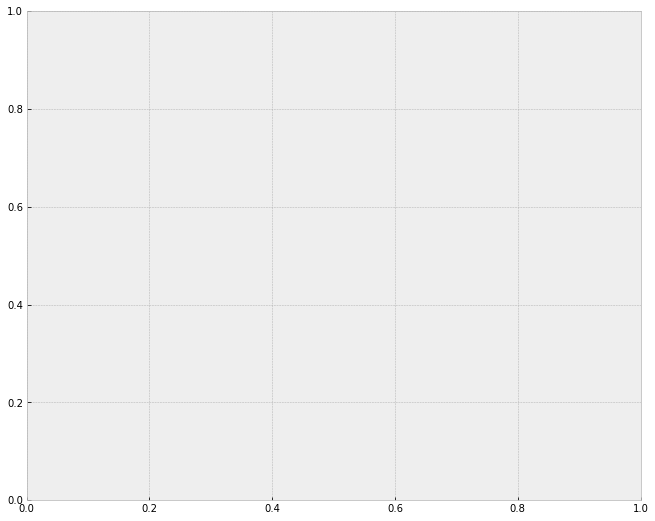

In [29]:
corr = young[good_columns].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=.3,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5})

There is indeed a correlation between Final Judgement and God! Religios people tend to believe more that the bas ones will suffer.

In [ ]:
print (os['Final judgement'][0:2])

In [ ]:
print (os['Religion'][0:2])

The ones who spend money on entertainment, also spend money on looks and gadgets.

In [ ]:
print (os['Entertainment spending'])

Lets exclude of the element from the correlation pair once the correlation is more than 0.5

In [ ]:
corr = young.corr()
os = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
display(os[abs(os)>0.5])
drop_colinera_cols = os[abs(os)>0.5].reset_index()['level_1']

### Preparing the dataset for ML

In [ ]:
clean_data = young.dropna(subset=[var_of_interest])
features_int = [col for col in clean_data.columns if clean_data[col].dtype!='object']
features_cats = [col for col in clean_data.columns if clean_data[col].dtype=='object']

features_int = list(set(features_int) - set(drop_colinera_cols))
print ('Number of features {:.0f}'.format(len(features_int)))

We will impute missing values with the mean, althought there are some better solutions to do it, like imputing Height and Weight according to the Gender or taking randomly a value in the range [mean - std, mean + std]

In [ ]:
X = clean_data[features_int]
mean_values = X.mean(axis=0)
X = X.apply(lambda x: x.fillna(x.mean()),axis=0)
#X_cats = clean_data[features_cats].drop(var_of_interest, 1)
#X_cats = X_cats.drop('House - block of flats', 1)
#X_cats = pd.get_dummies(X_cats)
#print(X.shape)
#print(X_cats.shape)

In [ ]:
Y = clean_data[var_of_interest]
for key, val in mapping[var_of_interest].items():
    Y.replace(key,val, inplace = True)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=100)

It is also a good idea to have a look on the distrubtion once me imputed the values to be sure that we did not disrupt it.

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

sns.kdeplot(X.Height,label = 'Before imputation', ax = ax[0]);
sns.kdeplot(clean_data.Height, label = 'After imputation', ax = ax[0]);
ax[0].set_title('Height');

sns.kdeplot(X.Age,label = 'Before imputation', ax = ax[1]);
sns.kdeplot(clean_data.Age, label = 'After imputation', ax = ax[1]);
ax[1].set_title('Age');

#sns.kdeplot(X.Weight,label = 'Before imputation', ax = ax[2])
#sns.kdeplot(clean_data.Weight, label = 'After imputation' , ax = ax[2])
#ax[2].set_title('Weight')

## Machine Learning

We will standardize variables to be sure that everything is on whie scale as it plays quite an important role in regularization as we will apply logistic regression. The goal is to find variables that have more effect on the dependent variable (aka rural or urban liver).

(One also could use another metric to optimize like f1 but in fact accuracy metrix performed somehow better on this dataset regarding the f1 and accuracy score on test set.)

In [ ]:
# standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# gridsearch for parameter tuning
from sklearn.linear_model import LogisticRegression
clr = LogisticRegression()
KF = KFold(len(x_train), n_folds=5)
param_grid = {'C':[.001,.01,.03,.1,.3,1,3,10]}
grsearch = GridSearchCV(clr, param_grid=param_grid, cv=KF, scoring = 'f1')
grsearch.fit(x_train, y_train)
print(grsearch.best_params_)

# fitting logistic regression and evaluating
clr = LogisticRegression(C=grsearch.best_params_['C'])
clr.fit(x_train, y_train)

mean_accuracy = np.mean(cross_val_score(clr, x_train, y_train, cv=KF))
print('Average accuracy score on CV set: {:.2f}'.format(mean_accuracy))

mean_f1 = np.mean(cross_val_score(clr, x_train, y_train, cv=KF, scoring = 'f1'))
print('Average f1 on CV set: {:.2f}'.format(mean_f1))
print('')
print('Accuracy score on test set is: {:.2f}'.format(clr.score(x_test, y_test)))
recall = recall_score(y_test, clr.predict(x_test))
print ('Recall on test: {:.2f}'.format(recall))
precision = precision_score(y_test, clr.predict(x_test))
print ('Presicion on test: {:.2f}'.format(precision))
print ('F1 score on test: {:.2f}'.format((2*recall*precision /(recall + precision))))



Lets look at the impact of all features on our rural-village liver classification. And no worries, we will zoom in.

In [ ]:
feat_coeff = pd.DataFrame({'features': X.columns,'impacts': clr.coef_[0]})
feat_coeff = feat_coeff.sort_values('impacts', ascending=False)

fig, ax1 = plt.subplots(1,1, figsize=(30,6));
sns.barplot(x=feat_coeff.features, y=feat_coeff.impacts, ax=ax1);
ax1.set_title('All features', size=30);
ax1.set_xticklabels(labels=feat_coeff.features, size=20, rotation=90);
ax1.set_ylabel('Impact', size=30);

Zooming on only top 12 features based on their coefficients:

In [ ]:
top10 = pd.concat([feat_coeff.head(6),feat_coeff.tail(6)])
fig, ax1 = plt.subplots(1,1, figsize=(10,6))
sns.barplot(y=top10.features, x=top10.impacts, ax=ax1);
ax1.set_title('Top 12 features', size=20);
ax1.set_yticklabels(labels=top10.features, size=15);
ax1.set_xlabel('Impact', size=20);

You can interpret it as : For every unit change in gardening (so, you thought ok, it is actually 5 not 4) the log odds of you having lived in city is decreased by 0.156. 

It will get a bit simplier if we exponetiate the coefficients. The interpretation would be then: For every unit change in gardening the odds of you having lived in city is decreased by a factor exp(-0.156) = 0.8555592 (or by 85%).  

Disclaimer: As we have quite lots of features and only 1K samples, it would be good to do somekind of feature selection as linear models tend to suffer from non-informative features. (see Max Kuhn "Applied Predictive Modeling", Feature Selection)

**Insights:**
* Gardening, fear of dogs and storm, as well as religion decrease the odds of having lived in the city. Rural area livers are more exposed to gardening and might have more experience with dangerous dogs. As well as storm might have a more devastating effect on the village than on a city. People in the village are also typically a bit more religious than in the city.
* The fear of spiders increase the odds of living in the city. It is also intuitive as city livers are less used to spiders than the village livers. 

Sci-fi genre of movies might, healthy eating and fear of public speaking as well as getting angry are a bit speculative. Do urban livers get angry faster also why do they prefer Sci-fi more?

## The dessert: negative correlation between Life struggles, Weight and Heigt

In [ ]:
display(os.tail(3))

To understand why there is a negative correlation between life struggles, weight and height I will change the objectives. Now, we want to analyze the data based on the gender difference. So, lets plot correlation of each variable against the gender.

In [ ]:
cols_to_keep = ['Life struggles', 'Romantic', 'Shopping', 
                'Reading', 'Weight', 'Height', 'PC', 
                'Cars', 'Gender']
gender_map = {'Gender': {'female': 0, 'male': 1}}
corrs_dfs_gender = correlation_plot('Gender', young[cols_to_keep], gender_map, figsize=(5,5))

And a regression that will help us to get more insights.

In [ ]:
clean_data = young.dropna(subset=['Gender'])
features_int = [col for col in clean_data.columns if clean_data[col].dtype!='object']
X = clean_data[features_int]
mean_values = X.mean(axis=0)
X = X.apply(lambda x: x.fillna(x.mean()),axis=0)
Y = clean_data['Gender']
Y.replace('female',0, inplace = True)
Y.replace('male',1, inplace = True)

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

clr = LogisticRegression()
clr.fit(X, Y)
feat_coeff = pd.DataFrame({'features': features_int,'impacts': clr.coef_[0]})
feat_coeff = feat_coeff.sort_values('impacts', ascending=False)

top10 = pd.concat([feat_coeff.head(8),feat_coeff.tail(8)])
fig, ax1 = plt.subplots(1,1, figsize=(10,6))
sns.barplot(y=top10.features, x=top10.impacts, ax=ax1);
ax1.set_title('Top 16 features', size=20);
ax1.set_yticklabels(labels=top10.features, size=15);
ax1.set_xlabel('Impact', size=20);

Found it! If you are proned to "I cry when I feel down or things don't go the right way." you are probably a woman :). But if you are tall, or weight a lot or like to "PC Software, Hardware" then you are probably a man.

Negative correlation between Life struggles and Height/Weight was due to the female and male separation. Meaning, the taller you are (you are probably a male then) the less life struggles you have (which points to a woman)

**********************
**I will be happy to hear remarks or comments. If you liked the Kernel, please upvote :)**


**Have fun with the data!**
***********************

### Additional plots

Plots for all variables in the objective.

In [ ]:
fig, ax = plt.subplots(nrows=15, ncols=8, figsize=(30, 70), sharex=True)
start = 0
for j in range(15):
    for i in range(8):
        sns.barplot(
            y=features_int[start], x=var_of_interest, data=young, ax=ax[j, i])
        ax[j, i].set_ylabel('')
        ax[j, i].set_xlabel('')
        ax[j, i].set_title(features_int[start], fontsize=25)
        start += 1

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(7, 2), sharex=True)

for i in range(4):
    sns.barplot(y=features_int[start], x=var_of_interest, data=young, ax=ax[i])
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_title(features_int[start], fontsize=10)
    start += 1

Initially I was intened to analyze the difference between left and high handed but the class distribution is even more imbalanced.

In [ ]:
fig, ax = plt.subplots(nrows=15, ncols=9, figsize=(30, 70), sharex=True)
start = 0
for j in range(15):
    for i in range(9):
        sns.barplot(
            y=features_int[start],
            x='Left - right handed',
            data=young,
            ax=ax[j, i])
        ax[j, i].set_ylabel('')
        ax[j, i].set_xlabel('')
        ax[j, i].set_title(features_int[start], fontsize=25)
        start += 1

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(7, 2), sharex=True)
for i in range(4):
    sns.barplot(
        y=features_int[start], x='Left - right handed', data=young, ax=ax[i])
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_title(features_int[start], fontsize=10)
    start += 1